## Experiment 3 - XGBoosting
<hr>

<br>


## Assessment task 3
##### Data Product with Machine Learning

<hr>

### Nathan Collins  -  12062131

<br>
<br>
<br>



![image.png](https://i.ibb.co/k2XxH7H/Fat-person-on-plane-jpg-3-620x350.jpg
)


<br>
<br>
<br>

## The Brief:
You have been tasked to build a data product that will help users in the USA to better estimate their local travel airfare. 

Users will be able to provide details of their trip and the app will predict the expected flight fare.

<br>

<hr>

<br>

You will have to build a Streamlit app that let users provide the following inputs:

 - Origin airport
 - Destination airport
 - Departure date
 - Departure time
 - Cabin type (coach, premium, …)

 <br>

Your group will need to train 4 different models, one per student. Each student will need to submit their best model and make it available in the Streamlit app.

Users can validate their inputs by clicking on a button. The Streamlit application will then call the models trained by each student and return the predicted fares.

<br>
<hr>

## Deliverables:

Zip file containing project code, model artifacts, instructions or any relevant documents

Streamlit app users can interact with and get the results of the predictions

Final report describing the machine learning models and their hyperparameters or neural networks architecture, performance achieved, deployment. 

The report should not exceed 4000 words. You can find the report template: hereLinks to an external site.

<br>
<hr>

## Submission:

All assignments need to be submitted before the due date on Canvas. Penalties will be applied for late submission. 

Only one submission per group is required.



<br>
<br>
<br>
<br>


<br>
<br>
<br>
<br>

![image.png](https://i.ibb.co/wh2MfJR/5566691.png
) 

## Importing Libraries 

<hr>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import joblib
import zipfile
import os
from sklearn.preprocessing import LabelEncoder
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsRegressor

## Loading dataset

a sample of 20% of the dataset

In [4]:

# Filename where the dataset is stored
filename = r"/Users/nate/Desktop/MDSI/Sem_2/AMLA/assignment_3/data/processed_data/concatenated_df.pkl"

# Load the dataset into df
df = joblib.load(filename)


In [5]:
df.head()

,searchDate,DepartureDate,startingAirport,destinationAirport,totalFare,isRefundable,DepartureTime,coach,business,premium coach,first,numSegments,searchDayOfWeek,searchMonth,searchYear,DepartureDateDayOfWeek,DepartureDateMonth,DepartureDateYear,daysInAdvance
0,2022-04-23,2022-05-30,MIA,ATL,667.6,False,15:00,1.0,0.0,0.0,0.0,2,5,4,2022,0,5,2022,37
1,2022-04-16,2022-04-24,ATL,BOS,625.2,False,08:20,1.0,0.0,0.0,0.0,3,5,4,2022,6,4,2022,8
2,2022-04-24,2022-05-18,DEN,SFO,369.6,False,14:23,1.0,0.0,0.0,0.0,2,6,4,2022,2,5,2022,24
3,2022-04-25,2022-06-16,DTW,JFK,597.1,False,06:00,1.0,0.0,0.0,0.0,3,0,4,2022,3,6,2022,52
4,2022-04-18,2022-04-25,IAD,ATL,199.1,False,13:50,1.0,0.0,0.0,0.0,2,0,4,2022,0,4,2022,7


In [6]:

# Display shape
df.shape


(135008, 19)

In [7]:

# Drop Year columns
df = df.drop(["searchDate","DepartureDate","searchYear","DepartureDateYear"],axis=1)


## isRefundable datatype

In [8]:
df["isRefundable"] = df.isRefundable.astype(int)

## One hot encoding for airport categories

In [9]:

# Perform one-hot encoding
df = pd.get_dummies(df, columns=['startingAirport', 'destinationAirport'])

# Head
df.head()


,totalFare,isRefundable,DepartureTime,coach,business,premium coach,first,numSegments,searchDayOfWeek,searchMonth,...,destinationAirport_EWR,destinationAirport_IAD,destinationAirport_JFK,destinationAirport_LAX,destinationAirport_LGA,destinationAirport_MIA,destinationAirport_OAK,destinationAirport_ORD,destinationAirport_PHL,destinationAirport_SFO
0,667.6,0,15:00,1.0,0.0,0.0,0.0,2,5,4,...,0,0,0,0,0,0,0,0,0,0
1,625.2,0,08:20,1.0,0.0,0.0,0.0,3,5,4,...,0,0,0,0,0,0,0,0,0,0
2,369.6,0,14:23,1.0,0.0,0.0,0.0,2,6,4,...,0,0,0,0,0,0,0,0,0,1
3,597.1,0,06:00,1.0,0.0,0.0,0.0,3,0,4,...,0,0,1,0,0,0,0,0,0,0
4,199.1,0,13:50,1.0,0.0,0.0,0.0,2,0,4,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.columns

Index(['totalFare', 'isRefundable', 'DepartureTime', 'coach', 'business',
       'premium coach', 'first', 'numSegments', 'searchDayOfWeek',
       'searchMonth', 'DepartureDateDayOfWeek', 'DepartureDateMonth',
       'daysInAdvance', 'startingAirport_ATL', 'startingAirport_BOS',
       'startingAirport_CLT', 'startingAirport_DEN', 'startingAirport_DFW',
       'startingAirport_DTW', 'startingAirport_EWR', 'startingAirport_IAD',
       'startingAirport_JFK', 'startingAirport_LAX', 'startingAirport_LGA',
       'startingAirport_MIA', 'startingAirport_OAK', 'startingAirport_ORD',
       'startingAirport_PHL', 'startingAirport_SFO', 'destinationAirport_ATL',
       'destinationAirport_BOS', 'destinationAirport_CLT',
       'destinationAirport_DEN', 'destinationAirport_DFW',
       'destinationAirport_DTW', 'destinationAirport_EWR',
       'destinationAirport_IAD', 'destinationAirport_JFK',
       'destinationAirport_LAX', 'destinationAirport_LGA',
       'destinationAirport_MIA', 'destina

## DepartureTime to minutes of day

In [11]:

# Function to convert time to numeric format
def time_to_numeric(time_string):
    hours, minutes = map(int, time_string.split(':'))
    return hours + minutes/60

# Apply the conversion function
df['DepartureTime'] = df['DepartureTime'].apply(time_to_numeric)


<br>
<br>
<br>
<br>

![image.png](https://i.ibb.co/wh2MfJR/5566691.png
) 

## Splitting into X and Y

In [12]:

# Split X and Y
X = df.drop('totalFare', axis=1)  # Features
Y = df['totalFare']  # Target variable


## Standardisation

In [13]:

# Standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)


## Splitting into train and testing

In [14]:

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


<br>
<br>
<br>
<br>

![image.png](https://i.ibb.co/wh2MfJR/5566691.png
) 

## Baseline model

In [15]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate the mean of the target variable
Y_mean = np.mean(Y_train)

# Generate predictions using the mean
Y_pred_baseline = np.full_like(Y_test, fill_value=Y_mean)

# Calculate the baseline MSE and RMSE
baseline_mse = mean_squared_error(Y_test, Y_pred_baseline)
baseline_rmse = np.sqrt(baseline_mse)

# Display the baseline MSE and RMSE rounded to the nearest whole number
print("Baseline Model MSE:", round(baseline_mse))
print("Baseline Model RMSE:", round(baseline_rmse))


Baseline Model MSE: 41820
Baseline Model RMSE: 204


<br>
<br>
<br>
<br>

![image.png](https://i.ibb.co/wh2MfJR/5566691.png
) 

## XGBoosting

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

# Define the evaluate_model function with hyperparameter tuning
def evaluate_model(X_train, X_test, Y_train, Y_test, model, hyperparameter_grid=None):
    if hyperparameter_grid:
        # Create an XGBoost regressor
        xgb_model = XGBRegressor()
        
        # Perform hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(estimator=xgb_model, param_grid=hyperparameter_grid, cv=5, n_jobs=-1)
        grid_search.fit(X_train, Y_train)
        
        if hasattr(grid_search, "best_params_"):
            best_params = grid_search.best_params_
            model_instance = model(**best_params)
        else:
            model_instance = model
    else:
        model_instance = model

    # Call the fit method on the model without best_params
    model_instance.fit(X_train, Y_train)

    Y_pred = model_instance.predict(X_test)
    print("_________________________________________________________________________________")
    print("\n")
    print(f'Results for ({model.__name__})')
    print("\n")
    print("_________________________________________________________________________________")
    print("\n")
    
    # Create a scatter plot for predicted versus real values
    plt.figure(figsize=(8, 6))
    plt.scatter(Y_test, Y_pred, color='grey', label='Predicted vs Real', alpha=0.7)
    plt.plot(Y_test, Y_test, color='orange', label='Prediction Line', linewidth=2, linestyle='dashed')
    plt.xlabel('Real Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'Predicted vs Real Values ({model.__name__})', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
    plt.show()

    # Perform cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_val_predict(model_instance, np.concatenate((X_train, X_test), axis=0), np.concatenate((Y_train, Y_test), axis=0), cv=kf, n_jobs=-1)

    cv_mse = mean_squared_error(np.concatenate((Y_train, Y_test), axis=0), cv_results)
    cv_rmse = np.sqrt(cv_mse)

    print("_________________________________________________________________________________")
    print("\n")

    print(f"Test Squared Error (MSE) ({model.__name__}):", round(cv_mse, 2))
    print("\n")
    print(f"Test Root Mean Squared Error (RMSE) ({model.__name__}):", round(cv_rmse, 2))

    print("\n")

    # Calculate and print Train MSE and RMSE
    train_mse = mean_squared_error(Y_train, model_instance.predict(X_train))
    train_rmse = np.sqrt(train_mse)

    print(f"Train Mean Squared Error (MSE) ({model.__name__}):", round(train_mse, 2))
    print("\n")
    print(f"Train Root Mean Squared Error (RMSE) ({model.__name__}):", round(train_rmse, 2))
    print("\n")
    print("_________________________________________________________________________________")

    # Print the best hyperparameters if available
    if hyperparameter_grid and hasattr(grid_search, "best_params_"):
        print(f"Best Hyperparameters ({model.__name__}):")
        for param, value in best_params.items():
            print(f"{param}: {value}")


_________________________________________________________________________________


Results for (XGBRegressor)


_________________________________________________________________________________




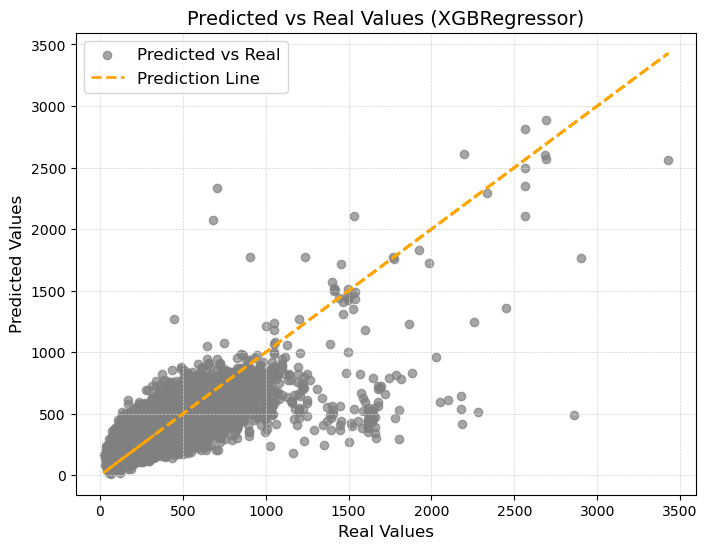

_________________________________________________________________________________


Test Squared Error (MSE) (XGBRegressor): 16534.6


Test Root Mean Squared Error (RMSE) (XGBRegressor): 128.59


Train Mean Squared Error (MSE) (XGBRegressor): 15035.53


Train Root Mean Squared Error (RMSE) (XGBRegressor): 122.62


_________________________________________________________________________________
Best Hyperparameters (XGBRegressor):
colsample_bytree: 0.9
max_depth: 5
n_estimators: 100
subsample: 0.9


In [15]:

hyperparameter_grid = {
    'n_estimators': [100],  # Number of boosting rounds
    'max_depth': [5],  # Maximum depth of the tree
    'subsample': [0.9],  # Fraction of samples used for fitting the trees
    'colsample_bytree': [0.8, 0.9],  # Fraction of features used for fitting the trees
}

# Call the evaluate_model function with hyperparameter tuning and the specified hyperparameter grid
evaluate_model(X_train, X_test, Y_train, Y_test, XGBRegressor, hyperparameter_grid)

_________________________________________________________________________________


Results for (XGBRegressor)


_________________________________________________________________________________




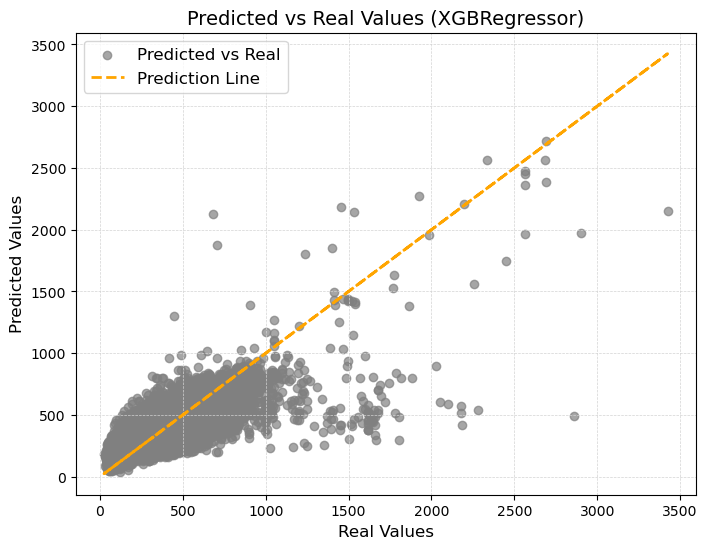

_________________________________________________________________________________


Test Squared Error (MSE) (XGBRegressor): 17106.16


Test Root Mean Squared Error (RMSE) (XGBRegressor): 130.79


Train Mean Squared Error (MSE) (XGBRegressor): 16194.68


Train Root Mean Squared Error (RMSE) (XGBRegressor): 127.26


_________________________________________________________________________________
Best Hyperparameters (XGBRegressor):
colsample_bytree: 0.8
learning_rate: 0.2
max_depth: 5
min_child_weight: 2
n_estimators: 100


In [16]:

hyperparameter_grid = {
    'n_estimators': [100],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'max_depth': [3, 4, 5],  # Maximum depth of the tree
    'min_child_weight': [1, 2, 3],  # Minimum sum of instance weight (hessian) needed in a child
    'colsample_bytree': [0.7, 0.8, 0.9],  # Fraction of features used for fitting the trees
}

# Call the evaluate_model function with hyperparameter tuning and the specified hyperparameter grid
evaluate_model(X_train, X_test, Y_train, Y_test, XGBRegressor, hyperparameter_grid)


_________________________________________________________________________________


Results for (XGBRegressor)


_________________________________________________________________________________




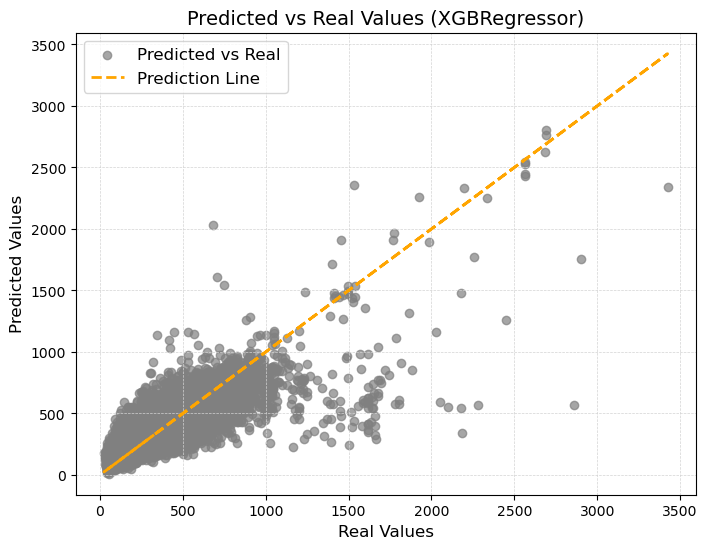

_________________________________________________________________________________


Test Squared Error (MSE) (XGBRegressor): 14425.48


Test Root Mean Squared Error (RMSE) (XGBRegressor): 120.11


Train Mean Squared Error (MSE) (XGBRegressor): 7136.15


Train Root Mean Squared Error (RMSE) (XGBRegressor): 84.48


_________________________________________________________________________________
Best Hyperparameters (XGBRegressor):
colsample_bytree: 0.7
learning_rate: 0.2
max_depth: 11
n_estimators: 100


In [17]:

hyperparameter_grid = {
    'n_estimators': [100],  # Number of boosting rounds
    'learning_rate': [0.2, 0.5, 1],  # Step size shrinkage to prevent overfitting
    'max_depth': [5, 7, 11],  # Maximum depth of the tree
    'colsample_bytree': [0.7, 0.8, 0.9],  # Fraction of features used for fitting the trees

}

# Call the evaluate_model function with hyperparameter tuning and the specified hyperparameter grid
evaluate_model(X_train, X_test, Y_train, Y_test, XGBRegressor, hyperparameter_grid)


_________________________________________________________________________________


Results for (XGBRegressor)


_________________________________________________________________________________




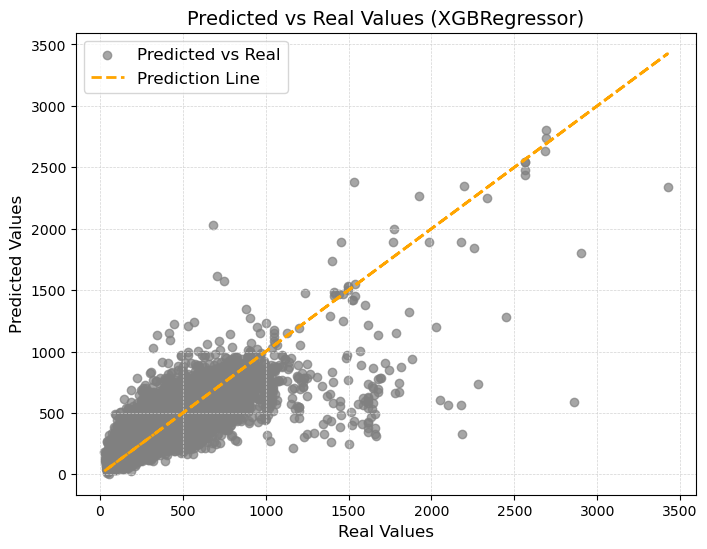

_________________________________________________________________________________


Test Squared Error (MSE) (XGBRegressor): 14079.04


Test Root Mean Squared Error (RMSE) (XGBRegressor): 118.66


Train Mean Squared Error (MSE) (XGBRegressor): 4379.78


Train Root Mean Squared Error (RMSE) (XGBRegressor): 66.18


_________________________________________________________________________________
Best Hyperparameters (XGBRegressor):
colsample_bytree: 0.7
learning_rate: 0.2
max_depth: 11
n_estimators: 200


In [18]:

hyperparameter_grid = {
    'n_estimators': [200],  # Number of boosting rounds
    'learning_rate': [0.2, 0.5, 1],  # Step size shrinkage to prevent overfitting
    'max_depth': [ 11,13,15],  # Maximum depth of the tree
    'colsample_bytree': [0.7, 0.8, 0.9],  # Fraction of features used for fitting the trees

}

# Call the evaluate_model function with hyperparameter tuning and the specified hyperparameter grid
evaluate_model(X_train, X_test, Y_train, Y_test, XGBRegressor, hyperparameter_grid)

<br>
<br>
<br>
<br>

![image.png](https://i.ibb.co/wh2MfJR/5566691.png
) 

## Summary of the XGBoost models

| Model | Test MSE | Test RMSE | Train MSE | Train RMSE | colsample_bytree | max_depth | n_estimators | subsample | learning_rate | min_child_weight |
|-------|----------|-----------|-----------|------------|-------------------|-----------|--------------|-----------|----------------|------------------|
| 1     | 16534.6  | 128.59    | 15035.53  | 122.62     | 0.9               | 5         | 100          | 0.9       | -              | -                |
| 2     | 17106.16 | 130.79    | 16194.68  | 127.26     | 0.8               | 5         | 100          | -         | 0.2            | 2                |
| 3     | 14425.48 | 120.11    | 7136.15   | 84.48      | 0.7               | 11        | 100          | -         | 0.2            | -                |
| 4     | 14079.04 | 118.66    | 4379.78   | 66.18      | 0.7               | 11        | 200          | -         | 0.2            | -                |


<br>
<br>
<br>
<br>

![image.png](https://i.ibb.co/wh2MfJR/5566691.png
) 

## Hyperopt 

Since the best test metrics are the number 4, but it is highly overfitting we will proceed tuning with hyperopt in model's 3  zones.

In [17]:
from hyperopt import fmin, tpe, hp
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the objective function to minimize (in this case, mean squared error)
def objective(params):
    # Convert n_estimators and max_depth to integers
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])
    
    # Create an XGBRegressor with the given hyperparameters
    model = XGBRegressor(**params)
    
    # Train the model
    model.fit(X_train, Y_train)
    
    # Make predictions on the test set
    predictions = model.predict(X_test)
    
    # Calculate mean squared error
    mse = mean_squared_error(Y_test, predictions)
    
    # Return the negative mean squared error (Hyperopt minimizes the objective function)
    return {'loss': mse, 'status': 'ok'}

# Define the search space for hyperparameters
space = {
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 0.8),
    'learning_rate': hp.uniform('learning_rate', 0.1, 0.3),
    'max_depth': hp.quniform('max_depth', 9, 13, 1),
    'n_estimators': hp.choice('n_estimators', [100]),
}

# Use the Tree-structured Parzen Estimator (TPE) algorithm for optimization
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50)  # You can adjust the number of evaluations

# Print the best hyperparameters found by Hyperopt
print("Best Hyperparameters:")
print(best)

# Train the final model with the best hyperparameters
best_params = {
    'colsample_bytree': best['colsample_bytree'],
    'learning_rate': best['learning_rate'],
    'max_depth': int(best['max_depth']),
    'n_estimators': 100,  # Fixed value as per your requirement
}

final_model = XGBRegressor(**best_params)
final_model.fit(X_train, Y_train)

# Make predictions on the test set using the final model
final_predictions = final_model.predict(X_test)

# Calculate and print the final mean squared error
final_mse = mean_squared_error(Y_test, final_predictions)
print("Final Test MSE:", final_mse)


100%|██████████| 50/50 [16:30<00:00, 19.82s/trial, best loss: 13905.42402580398] 
Best Hyperparameters:
{'colsample_bytree': 0.6385421244897918, 'learning_rate': 0.21326721605095728, 'max_depth': 13.0, 'n_estimators': 0}
Final Test MSE: 13905.42402580398


In [22]:
dict(best)

{'colsample_bytree': 0.6385421244897918,
 'learning_rate': 0.21326721605095728,
 'max_depth': 13.0,
 'n_estimators': 0}

_________________________________________________________________________________


Results for (XGBRegressor)


_________________________________________________________________________________




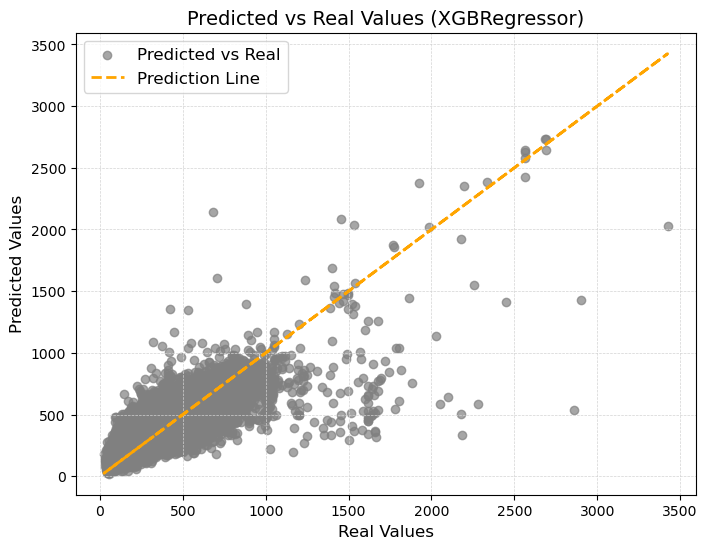

_________________________________________________________________________________


Test Squared Error (MSE) (XGBRegressor): 14343.19


Test Root Mean Squared Error (RMSE) (XGBRegressor): 119.76


Train Mean Squared Error (MSE) (XGBRegressor): 4340.16


Train Root Mean Squared Error (RMSE) (XGBRegressor): 65.88


_________________________________________________________________________________
Best Hyperparameters (XGBRegressor):
colsample_bytree: 0.64
learning_rate: 0.21
max_depth: 13
n_estimators: 100


In [24]:

hyperparameter_grid = {'colsample_bytree': [0.63,0.64],
 'learning_rate': [0.21, 0.22],
 'max_depth': [13],
 'n_estimators': [100]}

# Call the evaluate_model function with hyperparameter tuning and the specified hyperparameter grid
evaluate_model(X_train, X_test, Y_train, Y_test, XGBRegressor, hyperparameter_grid)


<br>
<br>
<br>
<br>

![image.png](https://i.ibb.co/wh2MfJR/5566691.png
) 

| Model | Test MSE  | Test RMSE | Train MSE | Train RMSE | colsample_bytree | max_depth | n_estimators | subsample | learning_rate | min_child_weight |
|-------|-----------|-----------|-----------|------------|-------------------|-----------|--------------|-----------|----------------|------------------|
| 1     | 16534.6   | 128.59    | 15035.53  | 122.62     | 0.9               | 5         | 100          | 0.9       | -              | -                |
| 2     | 17106.16  | 130.79    | 16194.68  | 127.26     | 0.8               | 5         | 100          | -         | 0.2            | 2                |
| 3     | 14425.48  | 120.11    | 7136.15   | 84.48      | 0.7               | 11        | 100          | -         | 0.2            | -                |
| 4     | 14079.04  | 118.66    | 4379.78   | 66.18      | 0.7               | 11        | 200          | -         | 0.2            | -                |
| Hyperopt   | 14343.19  | 119.76    | 4340.16   | 65.88      | 0.64              | 13        | 100          | -         | 0.21           | -                |


The model is overfitting the best way to continue is to utilise a different machine learning model with different characteristic.

## Save the best model

Model 4 will be chosen for deployment

In [25]:
import joblib
from xgboost import XGBRegressor

# Best Hyperparameters
best_hyperparameters = {
    'colsample_bytree': 0.7,
    'learning_rate': 0.2,
    'max_depth': 11,
    'n_estimators': 200
}

# Create an XGBoost model with the best hyperparameters
best_xgb_model = XGBRegressor(**best_hyperparameters)

# Train the XGBoost model
best_xgb_model.fit(X_train, Y_train)

# Save the model using joblib
joblib.dump(best_xgb_model, r'C:\Users\ferra\OneDrive\Escritorio\Master Of Data Science\Advance Machine Learning\Advanced_ML_Ass3\Models\XGB_model.pkl')


['C:\\Users\\ferra\\OneDrive\\Escritorio\\Master Of Data Science\\Advance Machine Learning\\Advanced_ML_Ass3\\Models\\XGB_model.pkl']

## Version for requirement.txt

In [26]:
import joblib
import pandas
import sklearn
import numpy
import xgboost

print("Joblib version:", joblib.__version__)
print("Pandas version:", pandas.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("Numpy version:", numpy.__version__)
print("XGBoost version:", xgboost.__version__)


Joblib version: 1.1.1
Pandas version: 1.5.3
Scikit-learn version: 1.2.1
Numpy version: 1.23.5
XGBoost version: 1.7.6


<hr>



## End of XGBoost Modelling


![image.png](https://i.ibb.co/wh2MfJR/5566691.png
) 